In [449]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import lmfit
from scipy import stats

In [2]:
#Lets try to understand how good the fits we made in last class are, lets load the supernova data again
label='sn_z_mu_dmu_plow_union2.1.txt'
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        if float(row[1]) > 0.1:
            continue
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))


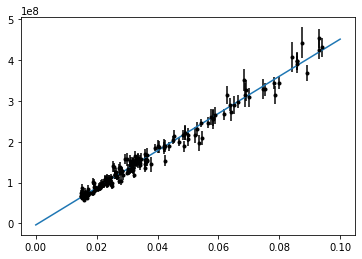

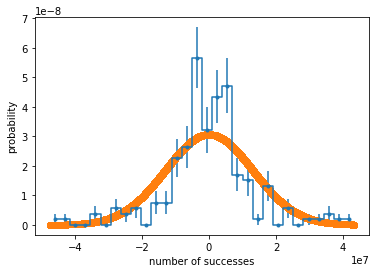

0.00999439790362972


In [25]:
#Lets run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

var=variance(redshift)
cov=covariance(redshift,distance)
slope=cov/var
const=distance.mean()-slope*redshift.mean()
xvals = np.linspace(0,0.1,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,slope,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.show()
#Now to compute the uncertainty
residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    residuals = np.append(residuals,pResid)
    #residuals = np.append(residuals,pResid**2)
#This time we are going to look at a histogram of the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],100)
normal=stats.norm.pdf(k,0,residuals.std())
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

So you can see our uncertainty distrituion has the same standard deviation as a normal(Gaussian) distribution. But what exactly is the normal distribution, and why are we so obsessed with it in statistics. Here is the analytic form of it
\begin{equation}
N(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
It hast the very important properties, that you can derive yourselves: 
\begin{equation}
E[N(x,\mu\,sigma]=\mu \\
V[N(x,\mu\,sigma]=\sigma^2 \\
\end{equation}

Now to see why we are so obsessed with it in statistics, lets do a little toy experiment and sum up some randomly chosen numbers. 


Summing: 1  numbers with mean: 4.954332912721788  and std-deviation 2.8912493167582443 2.860385440814947


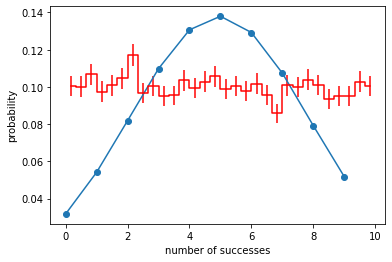

Summing: 2  numbers with mean: 9.936953293704754  and std-deviation 4.0624497364340995 4.056744194574219


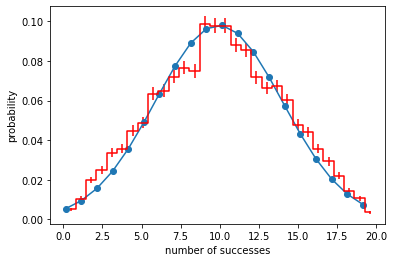

Summing: 3  numbers with mean: 15.041620464528547  and std-deviation 4.941039378619166 5.013873488176182


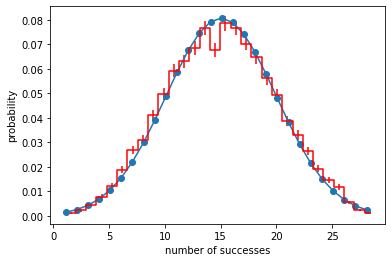

Summing: 4  numbers with mean: 20.031451383907022  and std-deviation 5.791724136346439 5.78258192437881


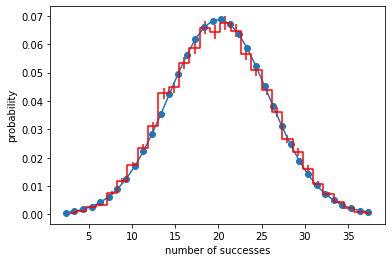

Summing: 50  numbers with mean: 249.64735062467386  and std-deviation 20.427938466696098 20.38362082227114


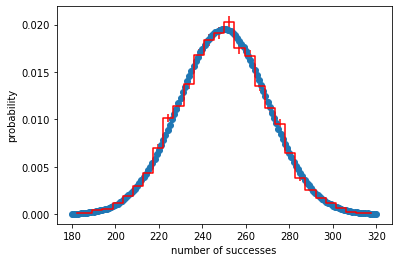

Summing: 5000  numbers with mean: 24998.010014876418  and std-deviation 204.18525783083396 204.10789707143647


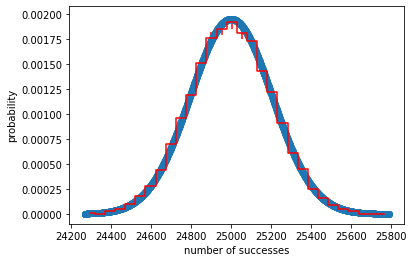

In [50]:
def normhist(iVars,iNbins=30):
    y0, bin_edges = np.histogram(iVars, bins=iNbins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,drawstyle = 'steps-mid',c='red')
    return bin_edges

def plotSum(iN):
    ntoys=10000
    sums=np.array([])
    for i0 in range(ntoys):
        pToy = np.random.uniform(0,10,iN)
        sums = np.append(sums,pToy.sum())
    binrange=normhist(sums)
    k=np.arange(binrange[0],binrange[-1])
    normal=stats.norm.pdf(k,sums.mean(),sums.std())
    plt.plot(k,normal,'o-')
    plt.xlabel("number of successes")
    plt.ylabel("probability")
    print("Summing:",iN," numbers with mean:",sums.mean()," and std-deviation",sums.std(),sums.mean()/math.sqrt(3*iN))
    plt.show()
plotSum(1)
plotSum(2)
plotSum(3)
plotSum(4)
plotSum(50)
plotSum(5000)

So the sum of random numbers becomes a gaussian with a mean distribtuion incidently the Variance of a flat distribution is the range$/\sqrt{12}$. To see this, lets compute it 
\begin{eqnarray}
V[x]&=&\int_{a}^{b}\frac{1}{b-a}\left(x-\frac{b-a}{2}\right)^2 dx\\
V[x]&=&\int_{-a^\prime}^{a^\prime}\frac{1}{2a^\prime}\left(x\right)^2 dx\\
V[x]&=&\frac{1}{2a^\prime}\frac{1}{3}\left(x\right)^3|_{-a^\prime}^{a^\prime} \\
V[x]&=&\frac{2a^3\prime}{2a^\prime}\frac{1}{3} \\
V[x]&=&\frac{\left(\frac{b-a}{2}\right)^2}{3} \\
V[x]&=&\frac{\left(b-a\right)^2}{12} \\
\end{eqnarray}
So the RMS of N random variables summed up we have the variance is given by 
\begin{eqnarray}
V[x_1+x_2+...+x_N]&=& N \frac{\left(b-a\right)^2}{12}\\
V[x_1+x_2+...+x_N]&=& N \frac{\bar{x}^2}{3}\\
\end{eqnarray}
The bottom is when $a=0$ as is the case here. This is why we can calculate the standard deviation of our sample. In any case, we will take this demo as a proof by demo of what we call **the cental limit theorem** which states that any distribution composed of inputs from a large number of continuous random varibles, the sum tends to a guassian. For fun, outside of class, go ahead and derive it. Lets compare the gaussian with a poisson distribution, so we can connect all of our friends together. 

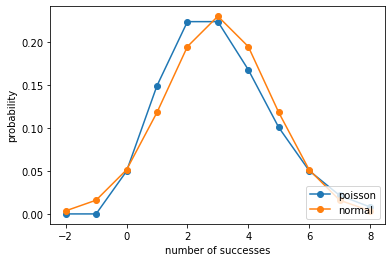

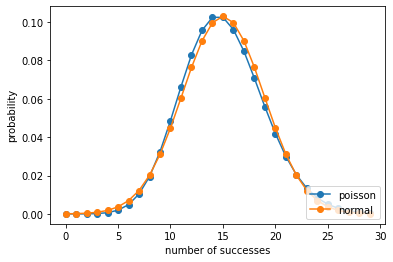

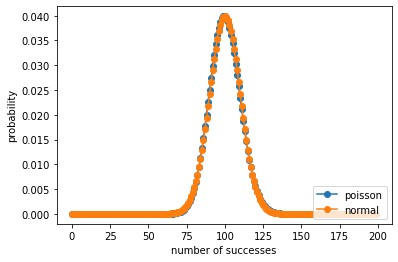

In [61]:
##### Lets plot a gaussian and poisson with same mean and RMS
n=3
lamb=n
k=np.arange(-2,3.0*n)
poisson=stats.poisson.pmf(k,lamb)
normal=stats.norm.pdf(k,n,math.sqrt(n))
plt.plot(k,poisson,'o-',label='poisson')
plt.plot(k,normal,'o-',label='normal')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend(loc='lower right')
plt.show()

n=15
lamb=n
k=np.arange(0,2.0*n)
poisson=stats.poisson.pmf(k,lamb)
normal=stats.norm.pdf(k,n,math.sqrt(n))
plt.plot(k,poisson,'o-',label='poisson')
plt.plot(k,normal,'o-',label='normal')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend(loc='lower right')
plt.show()

n=100
lamb=n
k=np.arange(0,2.0*n)
poisson=stats.poisson.pmf(k,lamb)
normal=stats.norm.pdf(k,n,math.sqrt(n))
plt.plot(k,poisson,'o-',label='poisson')
plt.plot(k,normal,'o-',label='normal')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend(loc='lower right')
plt.show()

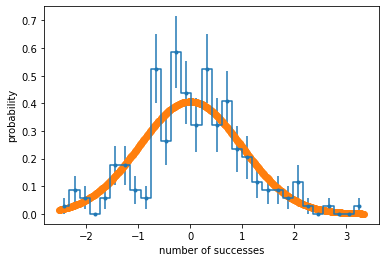

In [65]:
#So even the poisson distribution is a gaussian. Lets see if we can improve our residuals by dividing by error
residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    pResid=pResid/distance_err[i0]
    residuals = np.append(residuals,pResid)
    #residuals = np.append(residuals,pResid**2)
#This time we are going to look at a histogram of the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.01)
normal=stats.norm.pdf(k,0,residuals.std())
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

This is already a lot better which begs the question what metric is best to minimize when doing a fit. Lets consider an example. It turns out that 40% of all people have a gene where their pee smells after eating asparagus. Lets say we have 100 people and we observe 56 people claim their pee smells. What is the probability that this will happen. From the binomial probability we can write this as
\begin{equation}
P(56 smell|p)=p^{56}(1-p)^{44}\frac{100!}{44!56!}
\end{equation}
We can flip this observation and then compute the probablity of this distribtuion. This is what we refer to as the likelihood. 
\begin{equation}
{\rm The Likelihood} P(data|p)=p^{56}(1-p)^{44}\frac{100!}{44!56!}
\end{equation}

The maximum likelihood estimator (MLE) is thus the maximum of the probability given the data and a model.  Lets comput the maximum likelihood of this setup. 
\begin{eqnarray}
 \rm{MLE} P(data|p)&=&\frac{d}{dp} \left(p^{56}(1-p)^{44}\frac{100!}{44!56!}\right) = 0 \\
                 &=& 56 \left( p^{55}(1-p)^{44}\right) -44 \left(p^{56}(1-p)^{43}\right) = 0 \\
                               &=& 56 \left((1-p)\right) -44 \left(p\right) = 0 \\
              &=& 56 - 100 p = 0 \\
p             &=& \frac{56}{100}            
\end{eqnarray}
So the maximum likelihood differs from what we thought for our distribution. However in this scenario we are varying $p$ and not varying the actual decision. For completeness, we can also write the log likelihood. 
\begin{equation}
{\rm The Log Likelihood} \log\left(P(data|p)\right)= 56 \log p + 44 \log(1-p)+\log\left(\frac{100!}{44!56!}\right)
\end{equation}
We often write things in terms of $\log$ (which is base $e$) since probabilities can vary by large absolute valueds and $\log$ helps to mitigate the large variations. Also since $\log$ is postivie-definite and we can construct a one-to-one mapping, minimizing $\log(f)$ equates to minimizing $f$. 

Lets consider a poisson process, what is the rate of having high energy cosmic rays appear on the earth per unit area. This is often known as the cosmic ray flux. Lets analyze data from the Auger experiment. 
https://www.auger.org/index.php/science/data
Before we go into the physics of cosmic rays, lets look at the data. We can envision cosmic data as a poisson process. Think of it as the question, what is the rate of particles of a certain energy appearing. Lets take a look at the data. 


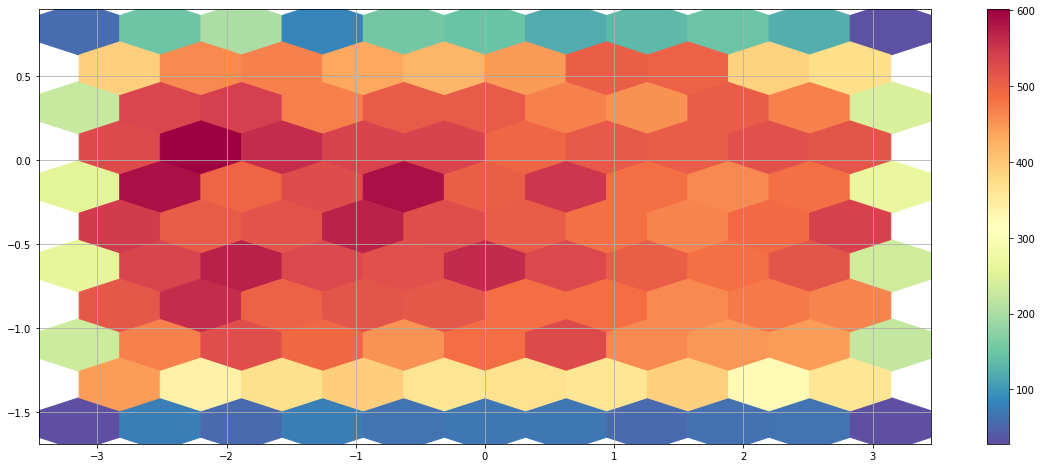

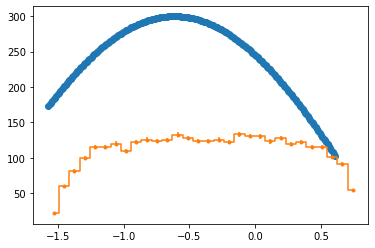

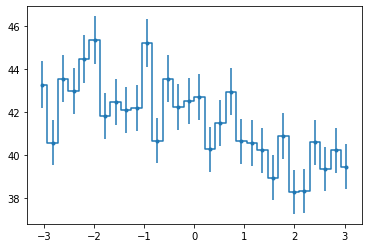

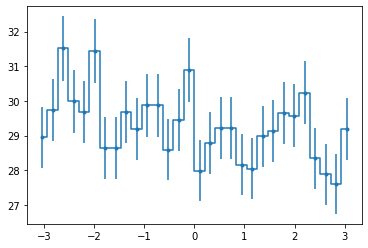

In [309]:
#Lets say we have
label='events_a8_1space.dat'

def rad(iTheta):
    return iTheta/180. * math.pi

def rad1(iTheta):
    return iTheta/180. * math.pi-math.pi

dec=np.array([])
ra=np.array([])
az=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile,delimiter=' ')
    for pRow in plots:
        if '#' in pRow[0] or pRow[0]=='':
            continue
        #print(pRow)
        #if float( pRow[2]) > 15:
        #    continue
        dec = np.append(dec,rad(float(pRow[2])))
        ra  = np.append(ra,rad1(float(pRow[3])))
        az  = np.append(az,rad(float(pRow[4])))

#coords = SkyCoord(l=x_list, b=y_list, unit='rad', frame="galactic")
#plt.subplot(111, projection='aitoff')
#plt.scatter(-coords.l.wrap_at('180d').radian, coords.b.radian, c=z_list, cmap='plasma', norm=colors.LogNorm(vmax=np.nanmax(z)))
#extent = [-math.pi,math.pi,ybnds[0],ybnds[1]] 
color_map = plt.cm.Spectral_r
fig = plt.figure(figsize=(20, 8))
#fig.add_subplot(111, projection='aitoff')
w=np.power(1./np.cos(dec+0.5),1,)*np.power(1./np.cos(dec+0.615),0.8)#angular correction
#image = plt.hist2d(ra, dec,weights=w,bins=10,density=True,cmap=plt.cm.jet)#,gridsize=40, mincnt=1)
#H, xedges, yedges = np.histogram2d(dec, ra,weights=w,bins=20)
#plt.imshow(H,extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]])
image = plt.hexbin(ra, dec, cmap=color_map,gridsize=10, mincnt=1,C=w,reduce_C_function=np.sum)
plt.colorbar()
plt.grid(True)
plt.show()


#k=np.arange(-math.pi/2.,0.614,0.01)
#normal=300*np.cos(k+0.614)
plt.plot(k,normal,'o-')
y0, bin_edges = np.histogram(dec,weights=w, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
plt.show()

y0, bin_edges = np.histogram(ra,weights=w, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
plt.show()

y0, bin_edges = np.histogram(az, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
plt.show()


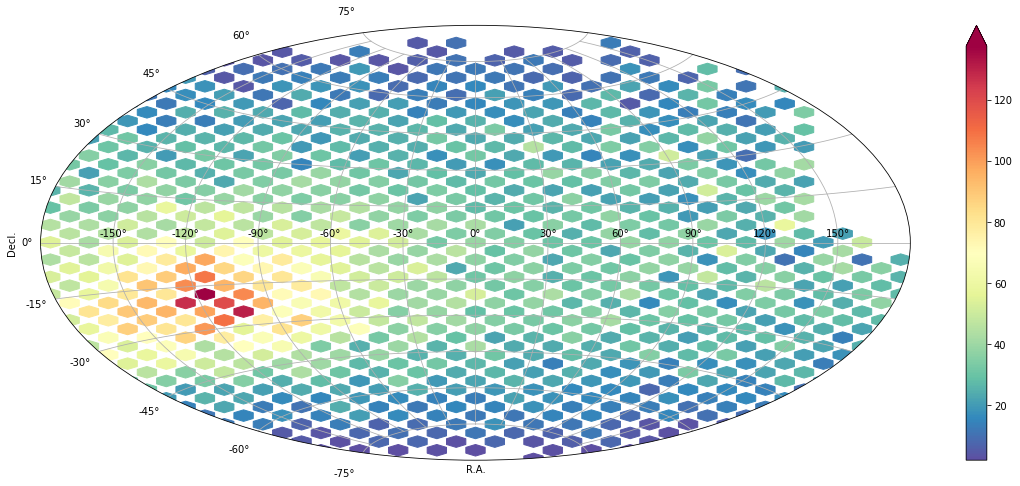

In [306]:
from astropy.coordinates import SkyCoord
from astropy import units
from astropy.coordinates import Galactic

coords = SkyCoord(ra=ra, dec=dec, unit='rad')
rap = coords.galactic.l.wrap_at(180 * units.deg).radian
decp = coords.galactic.b.radian

color_map = plt.cm.Spectral_r
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(111, projection='aitoff')
image = plt.hexbin(rap, decp, cmap=color_map,gridsize=45, mincnt=1,C=w,reduce_C_function=np.sum)

plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.grid(True)
plt.colorbar(image, spacing='uniform', extend='max')
plt.show()

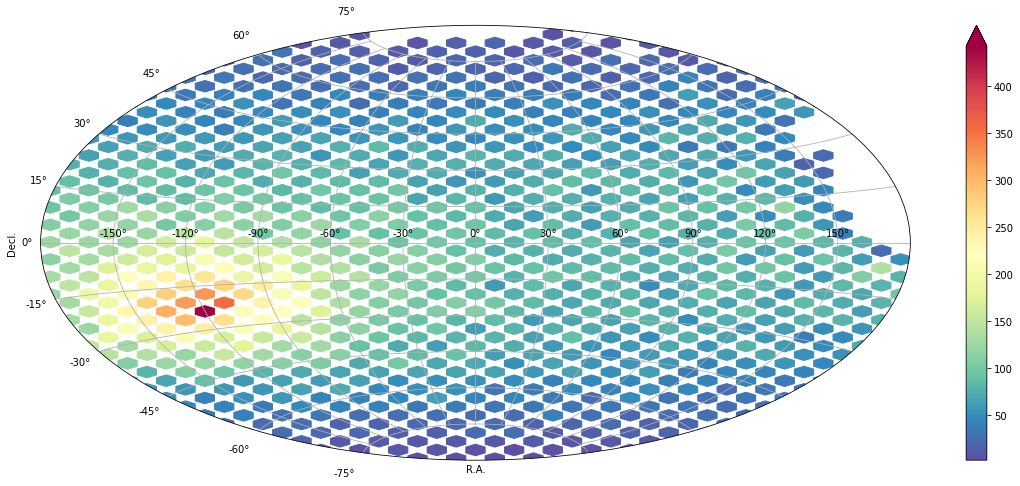

In [308]:
from astropy.coordinates import SkyCoord
from astropy import units
from astropy.coordinates import Galactic

coords = SkyCoord(ra=ra, dec=dec, unit='rad')
rap = coords.galactic.l.wrap_at(180 * units.deg).radian
decp = coords.galactic.b.radian

color_map = plt.cm.Spectral_r
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(111, projection='aitoff')
image = plt.hexbin(rap, decp, cmap=color_map,gridsize=45, mincnt=1,C=w,reduce_C_function=np.sum)

plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.grid(True)
plt.colorbar(image, spacing='uniform', extend='max')
plt.show()

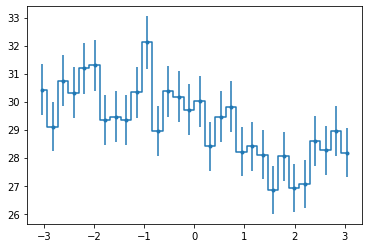

total/2
NLeft: 16600 +/- 128.84098726725125 NRight: 15587 +/- 124.84790747145104 None 16093.5


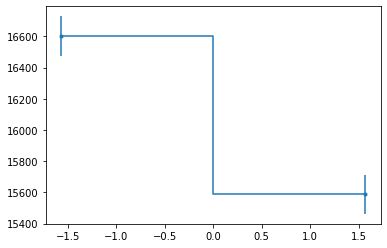

p-left 0.00036943129315803906 p-right 0.00032252051151133976 check 1.0


In [330]:
#Ok enough of having fun, lets look at the asymmetry we observe in right asecion
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
plt.show()

#even without corrections, we observe a clear asymmetry, lets look at the distribution of events between the two
#Lets say we have
NLeft=0
NRight=0
for i0 in range(len(ra)):
    if ra[i0] < 0:
        NLeft+=1
    else:
        NRight+=1
print("NLeft:",NLeft,"+/-",math.sqrt(NLeft),"NRight:",NRight,"+/-",math.sqrt(NRight),print("total/2"),len(ra)/2.)

y0, bin_edges = np.histogram(ra, bins=2)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()

lamb=len(ra)/2.
pleft=stats.poisson.pmf(NLeft,lamb)
pright=stats.poisson.pmf(NRight,lamb)
pcheck=stats.poisson.pmf(int(lamb),lamb)

print("p-left",pleft/pcheck,"p-right",pright/pcheck,"check",pcheck/pcheck)



And so on the left had side in ascension we see nearly 16600 events over a period of 10 years of operation of auger. If we take this as a rate, we have that $\lambda=np=16600$, which means that this process behaves as a poission with maximum likelihood $\lambda=16600$. To see this, lets write our a poisson distribution, we can imagine we have $N$ processes that have a probability of $1$ event in the time period the data was taken. The likelihood is just the probability of all $N$
\begin{equation}
L = \frac{\lambda^{N}}{N!} e^{-\lambda}\\
\log(L)=N\log(\lambda)-\lambda-\log(N!) \\
\frac{dL}{d\lambda}=0=\frac{N}{\lambda}-1\\
\lambda=N
\end{equation}
So the maximum likelihood for $\lambda$ is just the number of events we observe in the data. Hence we can use that for the aggregate or split distribution to deduce the deviation. 

However if we take the total number of events, and we predict the rate in right ascension to be uniform we have that $N_{tot}=16093.5$. In which case the likelihood for NLeft is $p=3\times10^{-4}$ less likely that than the central value. Likewise with the right. What about the lower energy data?

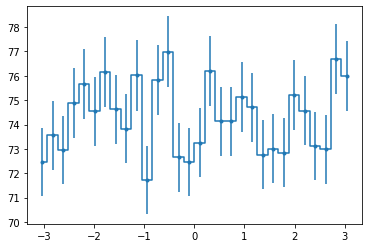

total/2
NLeft: 40843 +/- 202.0965115978007 NRight: 40858 +/- 202.13361917306088 None 40850.5


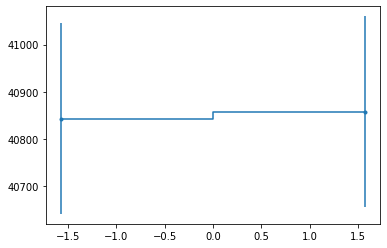

p-left 0.9994003979088298 p-right 0.9992170135352566 check 1.0


In [332]:
#Lets say we have
label='events_a4_1space.dat'

def rad(iTheta):
    return iTheta/180. * math.pi

def rad1(iTheta):
    return iTheta/180. * math.pi-math.pi

dec=np.array([])
ra=np.array([])
az=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile,delimiter=' ')
    for pRow in plots:
        if '#' in pRow[0] or pRow[0]=='':
            continue
        #print(pRow)
        #if float( pRow[2]) > 15:
        #    continue
        dec = np.append(dec,rad(float(pRow[2])))
        ra  = np.append(ra,rad1(float(pRow[3])))
        az  = np.append(az,rad(float(pRow[4])))
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
plt.show()
        
NLeft=0
NRight=0
for i0 in range(len(ra)):
    if ra[i0] < 0:
        NLeft+=1
    else:
        NRight+=1
print("NLeft:",NLeft,"+/-",math.sqrt(NLeft),"NRight:",NRight,"+/-",math.sqrt(NRight),print("total/2"),len(ra)/2.)

y0, bin_edges = np.histogram(ra, bins=2)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()

lamb=len(ra)/2.
pleft=stats.poisson.pmf(NLeft,lamb)
pright=stats.poisson.pmf(NRight,lamb)
pcheck=stats.poisson.pmf(int(lamb),lamb)

print("p-left",pleft/pcheck,"p-right",pright/pcheck,"check",pcheck/pcheck)



Now we see almost perfect symmetry. WTF just happened? Lets debate.

In extending this idea, what we can do next is try to define a likelihood for an arbitrary distribution. We can define the likelihood over a number of points by considering the probability of each bin given an expected mean. For this we have for $N$ bins where for bin $i$ we have $x_{i}$ number of events
\begin{eqnarray}
L(x|\lambda)&=&\Pi_{i=1}^{N} p(x_{i}|\lambda) \\
L(x|\lambda)&=&\Pi_{i=1}^{N} \frac{\lambda^{x_{i}}}{x_{i}!}e^{-\lambda} \\
\log(L(x|\lambda))&=&\sum_{i-1}^{N}  x_{i}\log(\lambda)-\log(x_{i}!)-\lambda
\end{eqnarray}
If we want to optmize this for a specific $\lambda$ then we just take the derivative
\begin{eqnarray}
\frac{d}{d\lambda}\log(L(x|\lambda))&=&0=\sum_{i-1}^{N}  \frac{x_{i}}{\lambda}-1 \\
 N\lambda&=&\sum_{i-1}^{N} x_{i} \\
 \lambda=\bar{x}
\end{eqnarray}

So the poission rate is just the average. More over, we can compute the variance above trivially from teh defintion of $\lambda$. In this case we get 
\begin{equation}
\sigma_{\lambda}^2=Var(\frac{1}{N}\sum_{i=1}^{N} x_{i})=\frac{1}{N^2}\sum^{N}_{i=1}Var(x_{i}) \\
\sigma_{\lambda}^2=\frac{1}{N^2}N\bar{x}=\frac{\bar{x}}{N}
\end{equation}

Lets compute the likelihood of our above distribtuions. 


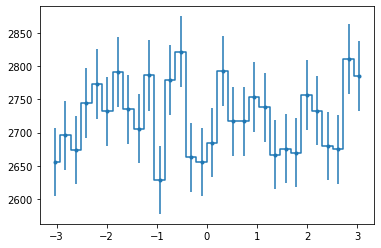

Likelihood 161.3120590533399


/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/pharris/Library/Python/3.7/lib/python/site-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


     fun: 161.31205905330353
    nfev: 43
     nit: 16
 success: True
       x: 2723.3667391968315 2723.366666666667


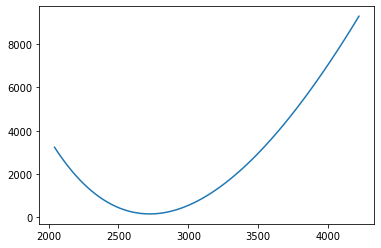

In [379]:

#For the flat guy we have
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y0,yerr=y0**0.5,marker='.',drawstyle = 'steps-mid')
plt.show()

def logpoisson(x):
    lTot=0
    for val in range(len(y0)):
        test = math.factorial(int(y0[val]))
        lTot = y0[val]*np.log(x) -x  - math.log(test) + lTot
    return -1.*lTot

lamb=y0.mean()
print("Likelihood",logpoisson(lamb))
x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.plot(x, logpoisson(x));

from scipy import optimize as opt
sol=opt.minimize_scalar(logpoisson, method='Brent')
print(sol,lamb.mean())


And so you see that by minimize the likelihood we are finding the optimium position of our parmeters. One thing to note is that now we see that the liklelihood is some giant number, but the log liklelihood is not large. Given our bins, we would like to test this variation and see if each bin is consistent with a poisson distribtuion. For this to be the case, our absolute likelihood value has to be a reasonable number. So what is a reasonable number?

Here is where we have to rely on some clever trickery. What ware going to do is invoke the central limit theorem, and state that since we are dealing with large numbers the distribtion of our sample about its expectation is going to be gaussian with standard devation gien by a poission distribution. Then, we can compute the log-likelihood, of this guy. Lets do it for each of our bins. 

\begin{eqnarray}
L(x|\lambda)&=&\Pi_{i=1}^{N} p(x_{i}|\lambda) \\
L(x|\lambda)&=&\Pi_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_{i}-\mu)^2}{2\sigma^2}} \\
-\log(L(x|\lambda))&=&\sum_{i-1}^{N}  -\frac{1}{2}\log(2\pi\sigma^2)+\frac{(x_{i}-\mu)^2}{2\sigma^2}\\
L(x|\lambda)&=&\Pi_{i=1}^{N} \frac{1}{\sqrt{2\pi\lambda}}e^{\frac{-(x_{i}-\lambda)^2}{2\lambda}} \\
-\log(L(x|\lambda))&=&\sum_{i-1}^{N}  -\frac{1}{2}\log(2\pi\lambda)+\frac{(x_{i}-\lambda)^2}{2\lambda}\\
\end{eqnarray}
So this is a little bit different, and as a consequence our likelihood value will bet different. Furthermore there is something else surprising and interestin about this. Lets look at just one term $N=1$ (not just for poission).
\begin{eqnarray}
f(x|\lambda) &=&-\frac{1}{2}\log(2\pi\sigma^2)+\frac{(x_{i}-\mu)^2}{2\sigma^2}\\
E[f(x)]      &=&-\frac{1}{2}\log(2\pi\sigma^2)+E[g(x)]\\
g(x)         &=&\frac{(x_{i}-\mu)^2}{2\sigma^2}\\
E[g(x)]      &=&\frac{\rm{Var}(x)}{2\sigma^2}\\
E[g(x)]      &=&\frac{\sigma^2}{2\sigma^2}=1/2\\
\end{eqnarray}
Where now we have targetted in on this one parameter $g(x)$ since the other parmeter is just a constant. Furthermore since we have assumed $x_{i}$ are each gaussian distributed with mean $\mu$ we get the expectation for this distribtuion is zero. As a consquence we have that $\log$ of the likelihood using a gaussian will be 1/2$-\frac{1}{2}\log(2\pi\sigma^2)$. Since the 2nd term doesn't affect the optimization it is often dropped. This gives us a much simpler optimization, which we multiply by 2 to make it look nice. 
\begin{eqnarray}
g(x) &=& \frac{(x_{i}-\mu)^2}{\sigma^2}\\
\end{eqnarray}
For variables, which are truly gaussian distributed we expect this to be 1. Furthermore if we sum over many of these variables we get: 
\begin{eqnarray}
g(x) &=& \sum_{i=1}^{N} \frac{(x_{i}-\mu)^2}{\sigma^2}\\
E[g(x)] & = & N
\end{eqnarray}
We then expect that for gaussian distributed variables this will give us a value of N. If our value is too small, then our value for $\sigma$ is too small. If our value for $N$ is too large large then we don't have a good fit to the data. 

Furthermore, the sum of $N$ independent gaussian random numbers with variance 1 has a formal distribution. This is a $chi^{2}$ distribution with N degrees of freedom, and $g(x)$ above is referred to as $\chi^{2}$. For a poission distribution, we can further simplify this to the classic $chi^{2}$ you all know and love:
 
\begin{eqnarray}
\chi^{2}(x) &=& \sum_{i=1}^{N} \frac{(x_{i}-\mu)^2}{\mu}\\
\end{eqnarray}

An important think to note is that 
\begin{eqnarray}
E[\chi^{2}(x)] &\approx& N \\
E[\chi^{2}(x)/N] &\approx& 1 
\end{eqnarray}
This last relation is known as the normalized $\chi^{2}$, which we expect to approach $1$ in the large $N$ limit. This is often why fits report the normalized $chi^{2}$. 

Lets take a look at our distribution with these variations. 


Likelihood -131.09869456062285 2723.366666666667 30
chi2 30.22764704142796
     fun: -131.10424329718748
    nfev: 40
     nit: 9
 success: True
       x: 2724.3704605147764 2723.366666666667
     fun: 30.224851660543553
    nfev: 41
     nit: 9
 success: True
       x: 2723.87041383182 2723.366666666667


/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/pharris/Library/Python/3.7/lib/python/site-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


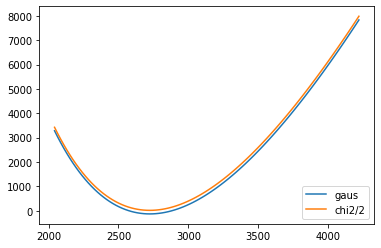

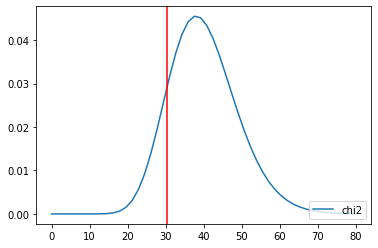

In [393]:
def loggaus(x):
    lTot=0
    for val in range(len(y0)):
        lTot = lTot+(0.5/(x+1e-5))*(y0[val]-x)**2
        lTot = lTot-0.5*np.log(math.pi*2*x)
    return lTot

def chi2(x):
    lTot=0
    for val in range(len(y0)):
        lTot = lTot+(1./(x+1e-5))*(y0[val]-x)**2
    return lTot


lamb=y0.mean()
print("Likelihood",loggaus(lamb),lamb,len(y0))
print("chi2",chi2(lamb))
x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.plot(x, loggaus(x),label='gaus');
plt.plot(x, chi2(x)/2.,label='chi2/2');
plt.legend(loc='lower right')
from scipy import optimize as opt
sol1=opt.minimize_scalar(loggaus, method='Brent')
print(sol1,lamb.mean())
sol2=opt.minimize_scalar(chi2, method='Brent')
print(sol2,lamb.mean())
plt.show()
#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2(lamb), c='red')
plt.legend(loc='lower right')

So our resulting $chi^{2}$ value seems quite likelihood. This is a sign of a good fit. Now before we go to look at a bad fit, I want to go back to the variance of distribution. Recall above  we found $\sigma_{\lambda}^{2}=frac{\bar{x}}{N}$. What if we can obtain this directly from our minimization?

With a little bit of math we can compute:
\begin{equation}
\rm{Var(\chi^{2}(x))}=2N
\end{equation}
Which means that for $\Delta \chi^{2}(x)=|\chi^{2}(x)-\chi^{2}(x\pm\sqrt{2N})|$ we are within a standard deviation of the minimum. What we do is assume our chi2 is right at the minimum and we compute this. Now what we can do is vary our $\chi^{2}$ about its minimum with respect to our parameters. presuming that our paramters are themselves gaussian, we have that they also follow a $\chi^{2}$ distribution of the model. Consequently $\Delta \chi^{2}$ varying our one paramter corresponds to the p-value of a $\chi^{2}$ distribution of 1-degree of freedom, or N-degrees if we are varying N-parameters. Consequently we have 
\begin{equation}
\rm{\Delta \chi^2} = 2 \Delta \log L = 1
\end{equation}
For 1 degree of freedom is needed. The simplest way to interpret this is through a taylor expansion of $\chi^{2}$
\begin{equation}
\chi^{2}(x_{i},\mu)=\chi^{2}_{min}(x_{i},\mu_{0})+\frac{1}{2}\frac{\partial^{2}}{\partial \mu^{2}}\chi^{2}_{min}(x_{i},\mu_{0})(\mu-\mu_{0})^{2}
\end{equation}
Since we can write out the full form with poisson uncertainty lets solve
\begin{eqnarray}
\rm{\Delta \chi^2}& = & \frac{1}{2} = \sum_{i=1}^N\frac{(x-\mu_0+\sigma_{\mu})^{2}}{2\mu_0}-\sum_{i=1}^N\frac{(x-\mu_0)^{2}}{2\mu_0}\\
1 & \approx & \sum_{i=1}^N\frac{(x-\mu_0+\sigma_{\mu})^{2}}{\mu_0}-\sum_{i=1}^N\frac{(x-\mu_0)^{2}}{\mu_0}\\
1 & = & \frac{1}{\mu_0}\sum_{i=1}^N (x-\mu_0+\sigma_{\mu})^{2}-(x-\mu_0)^{2}\\
1 & = & \frac{1}{\mu_0}\sum_{i=1}^N \sigma_{\mu}^{2}+2\sigma_{\mu}(x-\mu_0) \\
1 & = & \frac{N\sigma_{\mu}^{2}}{\mu_0} \\
\sigma_{\mu}^{2} & = & \frac{\mu_{0}}{N}   \\
\end{eqnarray}
Just as in deriviation of $\sigma_{\lambda}^{2}$ above. This gives us a strong confirmation of the taylor expansion approach that we can verify emperically as well. Through this appraoch, we also immediately get the correspondance in the variaton of the $\chi^{2}$ that $\frac{\partial^{2} \chi^{2}}{\partial \theta^{2}}=\frac{2}{\sigma^2_{\theta}}$. This is known as Wilk's theoreme(https://www.jstor.org/stable/2957648?seq=1), and is related closely to a a more general form known as Wald's test. Its more generally written in terms of the likelihood as 
\begin{equation}
\sigma^{2}_{\theta} = \left(\frac{\partial^{2}\log L}{\partial\theta^{2}}\right)^{-1}
\end{equation}

So how do we comput this $\Delta\chi^{2}$ variation. This comes from gettin the confidence interval of the minimum. We will not go into here so much, next lecture, but suffice it to say we want to find $x$ such that
\begin{equation}
1\sigma = 68\% = \int_{x}^{\infty} \chi^{2}(y,\nu) dy \\
1\sigma = 68\% = {\rm cdf}(\chi^{2})(x,\nu) \\
\end{equation}
Where $\nu$ now is the number of parameters floating. 


For multiple parameters, we write this as a vector $\vec{\theta_{i}}$, we can expand this in terms of the Hessian$\frac{\partial^{2}\chi^{2}}{\partial\theta_{i}\partial\theta_{j}}$, the taylor expansion is as follows
\begin{equation}
\chi^{2}(x_{i},\vec{\theta})=\chi^{2}_{min}(x_{i},\vec{\theta})+\frac{1}{2}(\theta_{i}-\theta_{j})^{T}\frac{\partial^{2}}{\partial \theta_{i}\theta_{0}}\chi^{2}_{min}(x_{i},\vec{\theta}_{0})(\theta_{j}-\theta_{0})
\end{equation}




0.6826894921370859


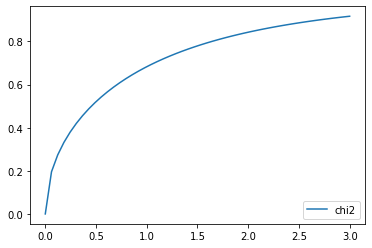

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 2733.4291276943463
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 2714.3451272070347
sol1 2732.8944622610784
sol2 2713.838871072255


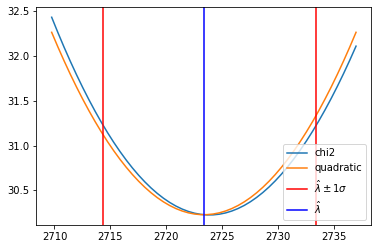

In [459]:
#print(stats.chi2.cdf(1,2),stats.chi2.cdf(2,2))
print(stats.chi2.cdf(1,1))
x = np.linspace(0,3)
chi2d=stats.chi2.cdf(x,1) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.legend(loc='lower right')
plt.show()

def chi2min(ival):
    minchi2=chi2(y0.mean())+1
    return chi2(ival)-minchi2

def quadratic(ival,ibase,imean,isol1,isol2):
    delta=(isol2.root-isol1.root)/2.
    out=1./delta/delta*(ival-imean)**2+ibase
    return out

sol1=opt.root_scalar(chi2min,bracket=[lamb, lamb*1.005],method='brentq')
sol2=opt.root_scalar(chi2min,bracket=[lamb*0.995, lamb],method='brentq')
print(sol1)
print(sol2)
print("sol1",y0.mean()+math.sqrt(y0.mean()/len(y0)))
print("sol2",y0.mean()-math.sqrt(y0.mean()/len(y0)))

lamb=y0.mean()
minlog=chi2(lamb)
x = np.linspace(lamb*0.995, lamb*1.005, 50)
plt.plot(x, chi2(x),label='chi2');
plt.plot(x, quadratic(x,minlog,lamb,sol1,sol2),label='quadratic');
plt.axvline(sol1.root, c='red',label="$\hat{\lambda}\pm1\sigma$")
plt.axvline(lamb, c='blue',label="$\hat{\lambda}$")
plt.axvline(sol2.root, c='red')
plt.legend(loc='lower right')
#plt.legend(loc='lower right')
plt.show()


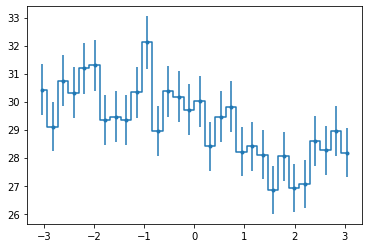

     fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578 1072.9


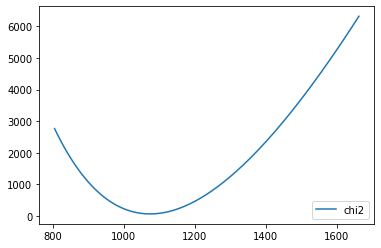

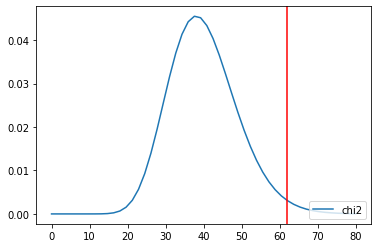

In [460]:
#Now lets look at the performance of chi^2 with the high energy data
#Lets say we have
label='events_a8_1space.dat'

dec=np.array([])
ra=np.array([])
az=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile,delimiter=' ')
    for pRow in plots:
        if '#' in pRow[0] or pRow[0]=='':
            continue
        #print(pRow)
        #if float( pRow[2]) > 15:
        #    continue
        dec = np.append(dec,rad(float(pRow[2])))
        ra  = np.append(ra,rad1(float(pRow[3])))
        az  = np.append(az,rad(float(pRow[4])))
y0, bin_edges = np.histogram(ra, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
plt.show()
        
lamb=y0.mean()
x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.plot(x, chi2(x),label='chi2');
plt.legend(loc='lower right')
from scipy import optimize as opt
sol2=opt.minimize_scalar(chi2, method='Brent')
print(sol2,lamb.mean())
plt.show()
#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2(lamb), c='red')
plt.legend(loc='lower right')


     fun: 61.89465449926082
    nfev: 39
     nit: 10
 success: True
       x: 1073.9315775283578
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1080.0202465349328
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1067.8772337950377
sol1 1078.880245256955
sol2 1066.9197547430451


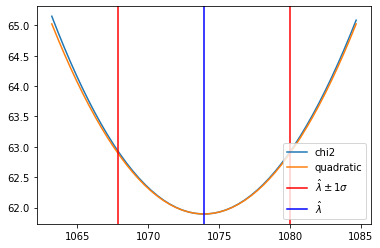

In [479]:
#So you see that the chance is unlikely
#Lets zoom in on the uncertainty

sol0=opt.minimize_scalar(chi2, method='Brent')
lamb=sol0.x
sol1=opt.root_scalar(chi2min,bracket=[lamb, lamb*1.01],method='brentq')
sol2=opt.root_scalar(chi2min,bracket=[lamb*0.99, lamb],method='brentq')
print(sol0)
print(sol1)
print(sol2)
print("sol1",y0.mean()+math.sqrt(y0.mean()/len(y0)))
print("sol2",y0.mean()-math.sqrt(y0.mean()/len(y0)))

minlog=chi2(lamb)
x = np.linspace(lamb*0.99, lamb*1.01, 50)
plt.plot(x, chi2(x),label='chi2');
plt.plot(x, quadratic(x,minlog,lamb,sol1,sol2),label='quadratic');
plt.axvline(sol1.root, c='red',label="$\hat{\lambda}\pm1\sigma$")
plt.axvline(lamb, c='blue',label="$\hat{\lambda}$")
plt.axvline(sol2.root, c='red')
plt.legend(loc='lower right')
#plt.legend(loc='lower right')
plt.show()


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 30
    # variables        = 1
    chi-square         = 62.0646320
    reduced chi-square = 2.14015973
    Akaike info crit   = 23.8093674
    Bayesian info crit = 25.2105648
[[Variables]]
    a:  1070.83118 +/- 8.74023221 (0.82%) (init = 1000)
odict_items([('a', <Parameter 'a', value=1070.8311789292245 +/- 8.74, bounds=[-inf:inf]>)]) 1070.8311789292245


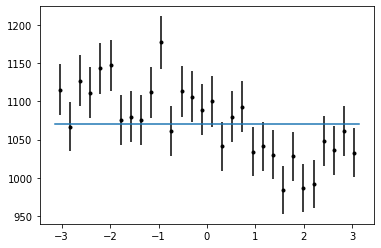

In [522]:
#So we sill get a quadratic, but now with a large minimum chi2. 
#What this means is that we can still fit, but our fit is not great
#Lets do the whole thing with LMFit to see
#Now lets use lmfit for completeness
def f(x,a):
    return a

y0, bin_edges = np.histogram(ra, bins=30)
xweights=np.array([])
x=np.array([])
y=np.array([])
for i0 in range(len(y0)):
    pVal = y0[i0]
    pX = float(bin_centers[i0])
    x = np.append(x,float(pX))
    y = np.append(y,float(pVal))
    pWeight = 1./math.sqrt(pVal)
    xweights = np.append(xweights,pWeight)
model  = lmfit.Model(f)
p = model.make_params(a=1000)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
print(result.params.items(),result.params["a"].value)
plt.errorbar(bin_centers,y0,yerr=y0**0.5,c='black',marker='.',linestyle = 'None')
x = np.linspace(bin_edges[0],bin_edges[-1], 50)
y=np.array([])
for pX in x:
    pOut=f(pX,result.params["a"].value)
    y=np.append(y,pOut)
plt.plot(x,y)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 26.8040965
    reduced chi-square = 0.95728916
    Akaike info crit   = 0.62072051
    Bayesian info crit = 3.42311528
[[Variables]]
    a:  1072.00653 +/- 5.84870422 (0.55%) (init = 1000)
    b: -50.0226479 +/- 8.24221274 (16.48%) (init = 10)


<Figure size 432x288 with 0 Axes>

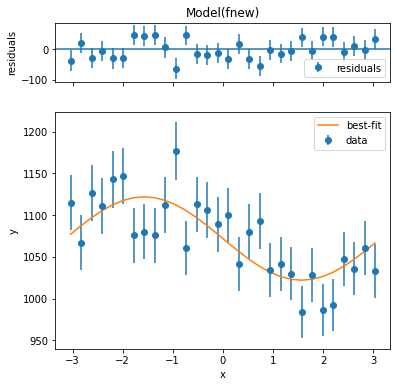

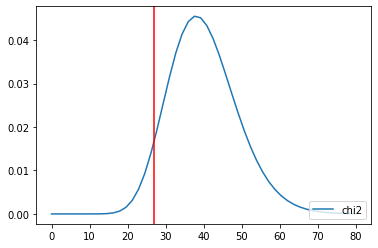

In [529]:
#We can define the "Chi-by-eye" test which states that if the points mostly line up with the best fit
#the, we are golden. (Our fit works). Note also that our fit fro lmfit gave slightly larger uncertainties
#This "I believe" is due to the whay lmfit finds the minimum. Now lets try to fix this fit by adding parameters
def fnew(x,a,b):
    pVal=b*np.sin(x)
    return a+pVal

x=np.array([])
y=np.array([])
xweights=np.array([])
for i0 in range(len(y0)):
    pVal = y0[i0]
    pX = float(bin_centers[i0])
    x = np.append(x,float(pX))
    y = np.append(y,float(pVal))
    pWeight = 1./math.sqrt(pVal)
    xweights = np.append(xweights,pWeight)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(result.chisqr, c='red')
plt.legend(loc='lower right')



      fun: 26.771997460728183
 hess_inv: array([[17.40034693, -0.50416445],
       [-0.50416445, 35.95279697]])
      jac: array([-2.62260437e-06, -4.52995300e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([1073.34616093,  -50.46127062])
0.3934693402873665
0.6833632306209467 0.6826894921370859


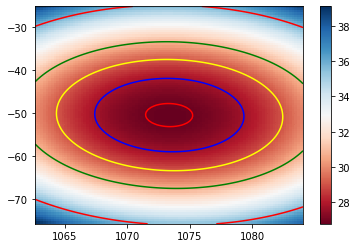

-1.0
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 1079.3411317815326       converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 1067.3846401731098 1D Uncertainty: 5.978245804211383
Reminder the Poission uncertianty would be: 5.180121043307706


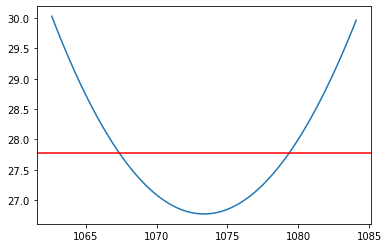

-1.0
      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -58.96461634832162       converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -41.952962089132534 1D Uncertainty: 8.505827129594543


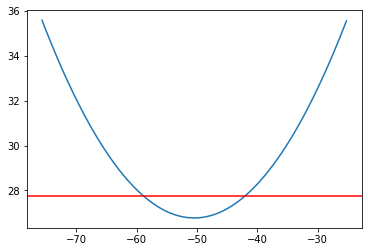

In [574]:
#Now our chi by eye looks good. Also the chi2 value is in our wheelhouse, so this looks like a good fit
#Additionally we see now that we have two parameters with uncertainties, lets try to do the computation by hand
def chi2(x):
    lTot=0
    for val in range(len(y0)):
        xtest=fnew(bin_centers[val],x[0],x[1])
        lTot = lTot+(1./(xtest+1e-5))*(y0[val]-xtest)**2
    return lTot

x0 = np.array([1000,10])
ps = [x0]
sol=opt.minimize(chi2, x0)
print(sol)
plt.show()
#Look the same answers, now lets plot the chi2
x = np.linspace(sol.x[0]*0.99,sol.x[0]*1.01, 100)
y = np.linspace(sol.x[1]*0.5,sol.x[1]*1.5, 100)
X, Y = np.meshgrid(x, y)
print(stats.chi2.cdf(1,2))
print(stats.chi2.cdf(2.30,2),stats.chi2.cdf(1,1))
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
#for pX in X:
#    for pY in y:
#x**2 + 100*Y**2
#plt.colormesh(X, Y, Z, cmap=cmap, norm=norm)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Now lets fix one parameter at the minimum, and profile the other
plt.plot(x, chi2([x,sol.x[1]]),label='chi2');
plt.axhline(sol.fun+1, c='red')
#from the intercepts, we can get the uncertainties
def chi2minX(xval):
    val=chi2([xval,sol.x[1]])
    minval=chi2(sol.x)+1
    return val-minval
print(chi2minX(sol.x[0]))
sol1=opt.root_scalar(chi2minX,bracket=[sol.x[0], sol.x[0]*1.02],method='brentq')
sol2=opt.root_scalar(chi2minX,bracket=[sol.x[0]*0.98, sol.x[0]],method='brentq')
print(sol1,sol2,"1D Uncertainty:",abs(sol2.root-sol1.root)/2.)
print("Reminder the Poission uncertianty would be:",math.sqrt(sol.x[0]/40))
plt.show()

#Now for the other parameter
plt.plot(y, chi2([sol.x[0],y]),label='chi2');
plt.axhline(sol.fun+1, c='red')
def chi2minY(yval):
    val=chi2([sol.x[0],yval])
    minval=chi2(sol.x)+1
    return val-minval
print(chi2minY(sol.x[1]))
sol1=opt.root_scalar(chi2minY,bracket=[sol.x[1],    sol.x[1]*1.2],method='brentq')
sol2=opt.root_scalar(chi2minY,bracket=[sol.x[1]*0.8, sol.x[1]],method='brentq')
print(sol1,sol2,"1D Uncertainty:",abs(sol2.root-sol1.root)/2.)
plt.show()

#plt.plot(x, quadratic(x,minlog,lamb,sol1,sol2),label='quadratic');
#Now for comparison, lets plot a 2D  parabola about our best fit
#def chi2pdf(x):
#    stats.chi2.pdf(,2)

So now we have used our minimizer in 2D to profile the $chi^{2}$ distribution, and we have obtained an uncertainty by looking at $\Delta chi^{2}$, and you can see that our semi by-hand manipulation got us to the best parameters of the fitting. Additionally by profiling $\chi^{2}$ in each of the single parameters we obtained the same uncertiinties. 

As a small note our final fitted uncertainty is a little bit larger than the poission uncertainty. In fact for all fits there is a rule that our uncertainties on any parameter have to be larger than a certain parameter. This bound is known as the Cramer-Rao bound. I won't derive it or go into in detail, but the Cramer-Rao bound states. 
\begin{equation}
\rm{Var}(\theta|\hat{\theta}) \geq \frac{1}{\mathcal{I}(\theta)} \\
\mathcal{I}(\theta) = E_{p(X|\theta)}\left[-\frac{\partial^{2}}{\partial\theta^{2}}\log\left(p\left(x|\theta\right)\right)\right]
\end{equation}
Where here we call $\mathcal{I}(\theta)$ the Fisher information. While I don't want to go into this more, this result is powerful becuase it means that there is limit to when you should stop searching for a best fit. 

Now lets got back to our fit, we got the $1D$ results, but we made this 2D plot, and we drew a funny yellow line on it above. 

